In [2]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.metrics import mean_squared_error
from numpy.linalg import inv
import datetime
import time

## Load Data

#### Stock Price Data

In [3]:
datapath = os.path.dirname(os.getcwd()) + "/Data/StockWD/Stock_Full_All/"
datalist = os.listdir(datapath)
stock_universe = {}
ticker = []
for i in range(len(datalist)):
    stockname = str.split(datalist[i],".csv")
    if(len(stockname) == 2):
        ticker.append(stockname[0])
        stock_universe[stockname[0]] = pd.read_csv(datapath + datalist[i],encoding='iso-8859-1')
        stock_universe[stockname[0]] = stock_universe[stockname[0]].set_index(stock_universe[stockname[0]]['Date'])
        stock_universe[stockname[0]]['Marketcap'] = stock_universe[stockname[0]]['CLOSE']*stock_universe[stockname[0]]['FLOAT_A_SHARES']/100000000

In [4]:
stock_cols = list(stock_universe[stockname[0]].columns)
print(stock_cols)
stock_universe[ticker[0]].head()

['Date', 'TRADE_STATUS', 'PRE_CLOSE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME', 'AMT', 'VWAP', 'TOTAL_SHARES', 'FREE_FLOAT_SHARES', 'FLOAT_A_SHARES', 'MF_AMT', 'MF_VOL', 'MF_AMT_CLOSE', 'MF_AMT_OPEN', 'MRG_LONG_BAL', 'MRG_SHORT_VOL_BAL', 'PRE_CLOSE_AFTY', 'OPEN_AFTY', 'HIGH_AFTY', 'LOW_AFTY', 'CLOSE_AFTY', 'VWAP_AFTY', 'Marketcap']


,Date,TRADE_STATUS,PRE_CLOSE,OPEN,HIGH,LOW,CLOSE,VOLUME,AMT,VWAP,...,MF_AMT_OPEN,MRG_LONG_BAL,MRG_SHORT_VOL_BAL,PRE_CLOSE_AFTY,OPEN_AFTY,HIGH_AFTY,LOW_AFTY,CLOSE_AFTY,VWAP_AFTY,Marketcap
Date,,,,,,,,,,,,,,,,,,,,,
1991-04-03,1991-04-03,½»Ò×,40.00,49.00,49.00,49.00,49.00,100.0,5000.0,50.0,...,0,0,0.0,40.00,49.00,49.00,49.00,49.00,50.0,12.9850
1991-04-04,1991-04-04,½»Ò×,49.00,48.76,48.76,48.76,48.76,300.0,15000.0,50.0,...,0,0,0.0,49.00,48.76,48.76,48.76,48.76,50.0,12.9214
1991-04-05,1991-04-05,½»Ò×,48.76,48.52,48.52,48.52,48.52,200.0,10000.0,50.0,...,0,0,0.0,48.76,48.52,48.52,48.52,48.52,50.0,12.8578
1991-04-08,1991-04-08,½»Ò×,48.52,48.04,48.04,48.04,48.04,200.0,10000.0,50.0,...,0,0,0.0,48.52,48.04,48.04,48.04,48.04,50.0,12.7306
1991-04-09,1991-04-09,½»Ò×,48.04,47.80,47.80,47.80,47.80,400.0,19000.0,47.5,...,0,0,0.0,48.04,47.80,47.80,47.80,47.80,47.5,12.6670


#### Close Price Table

In [136]:
Stock_Price = pd.DataFrame()
for i in ticker:
    print(i)
    k = pd.DataFrame(stock_universe[i]['CLOSE_AFTY'])
    k.columns = [i]
    Stock_Price = Stock_Price.append(k)

000001.SZ
000002.SZ
000004.SZ
000005.SZ
000006.SZ
000007.SZ
000008.SZ
000009.SZ
000010.SZ
000011.SZ
000012.SZ
000014.SZ
000016.SZ
000017.SZ
000018.SZ
000019.SZ
000020.SZ
000021.SZ
000022.SZ
000023.SZ
000025.SZ
000026.SZ
000027.SZ
000028.SZ
000029.SZ
000030.SZ
000031.SZ
000032.SZ
000033.SZ
000034.SZ
000035.SZ
000036.SZ
000037.SZ
000038.SZ
000039.SZ
000040.SZ
000042.SZ
000043.SZ
000045.SZ
000046.SZ
000048.SZ
000049.SZ
000050.SZ
000055.SZ
000056.SZ
000058.SZ
000059.SZ
000060.SZ
000061.SZ
000062.SZ
000063.SZ
000065.SZ
000066.SZ
000068.SZ
000069.SZ
000070.SZ
000078.SZ
000088.SZ
000089.SZ
000090.SZ
000096.SZ
000099.SZ
000100.SZ
000150.SZ
000151.SZ
000153.SZ
000155.SZ
000156.SZ
000157.SZ
000158.SZ
000159.SZ
000166.SZ
000301.SZ
000333.SZ
000338.SZ
000400.SZ
000401.SZ
000402.SZ
000403.SZ
000404.SZ
000407.SZ
000408.SZ
000409.SZ
000410.SZ
000411.SZ
000413.SZ
000415.SZ
000416.SZ
000417.SZ
000418.SZ
000419.SZ
000420.SZ
000421.SZ
000422.SZ
000423.SZ
000425.SZ
000426.SZ
000428.SZ
000429.SZ
000430.SZ


KeyboardInterrupt: 

In [133]:
Stock_Price.head()

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,000721.SZ,000722.SZ,000723.SZ,000725.SZ,000726.SZ,000727.SZ,000728.SZ,000729.SZ,000731.SZ,000732.SZ
Date,,,,,,,,,,,,,,,,,,,,,
1991-04-03,49.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-04,48.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-05,48.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-08,48.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-09,47.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'000733.SZ'

#### Stock Public Data

In [4]:
stockIDpath = os.path.dirname(os.getcwd()) + "/MuitiFactor Model/"
StockID = pd.read_csv(stockIDpath + "StockID.csv",encoding='iso-8859-1')

In [5]:
StockID.head()

,secID,postfix,ticker,secShortName,cnSpell,exchangeCD,assetClass,listStatusCD,listDate,transCurrCD,ISIN,partyID,ID
0,000001.XSHE,XSHE,1,Æ½°²ÒøÐÐ,PAYH,XSHE,E,L,1991/4/3,CNY,CNE000000040,2,000001.SZ
1,000002.XSHE,XSHE,2,Íò¿ÆA,WKA,XSHE,E,L,1991/1/29,CNY,CNE0000000T2,3,000002.SZ
2,000004.XSHE,XSHE,4,¹úÅ©¿Æ¼¼,GNKJ,XSHE,E,L,1991/1/14,CNY,CNE0000000Y2,5,000004.SZ
3,000005.XSHE,XSHE,5,ÊÀ¼ÍÐÇÔ´,SJXY,XSHE,E,L,1990/12/10,CNY,CNE0000001L7,6,000005.SZ
4,000006.XSHE,XSHE,6,ÉîÕñÒµA,SZYA,XSHE,E,L,1992/4/27,CNY,CNE000000164,7,000006.SZ


#### Index Data

In [80]:
Indexpath = os.path.dirname(os.getcwd()) + "/R/StrategyWorkFolder/"
Index = pd.read_csv(Indexpath + "Index300.csv",encoding='iso-8859-1')
Index = Index.set_index(Index['X'])

In [81]:
Index.head()

,X,SZ50,HS300,ZZ500
X,,,,
2011-01-04,2011-01-04,2015.11,3192.0,5011.50
2011-01-05,2011-01-05,1999.22,3186.8,5028.77
2011-01-06,2011-01-06,1984.28,3173.0,5001.28
2011-01-07,2011-01-07,2006.37,3171.0,4975.14
2011-01-10,2011-01-10,1975.74,3122.0,4830.56


#### Calendar

In [83]:
Calendarpath = os.path.dirname(os.getcwd()) + "/R/Lib/Funcs/"
Calendar = pd.read_csv(Calendarpath + "Calendar.csv",encoding='iso-8859-1',header=None)
Calendar.columns = ['Date','Weekday']
Calendar = Calendar.set_index(Calendar['Date'])

In [84]:
Calendar.head()

,Date,Weekday
Date,,
1990-12-19,1990-12-19,3
1990-12-20,1990-12-20,4
1990-12-21,1990-12-21,5
1990-12-24,1990-12-24,1
1990-12-25,1990-12-25,2


## Strategy

In [10]:
# 20day-vol/250day-vol
dti = "2011-01-01"
dts = "2014-01-01"
dte = "2016-07-01"
dataset = stock_universe[ticker[0]]
dataset = dataset.loc[np.logical_and(dataset['Date']>dti, dataset['Date']<dte),]
dataset['DailyRT'] = np.log(dataset['CLOSE_AFTY']).diff()
dataset = dataset.iloc[1:,:]
dataset = dataset[dataset['DailyRT']!=0]

/Users/TaoLuo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
startind = np.where(dataset['Date']>dts)[0][0]
endind = np.where(dataset['Date']<dte)[0][-1]
vol_ratio = np.arange(startind,endind,dtype=np.float)
vol_ratio2 = np.arange(startind,endind,dtype=np.float)
for i in range(startind,endind):
    ratio1 = (max(dataset['CLOSE_AFTY'].iloc[(i-20):(i-1)])-min(dataset['CLOSE_AFTY'].iloc[(i-20):(i-1)]))/min(dataset['CLOSE_AFTY'].iloc[(i-20):(i-1)])
    ratio2 = (max(dataset['CLOSE_AFTY'].iloc[(i-200):(i-1)])-min(dataset['CLOSE_AFTY'].iloc[(i-200):(i-1)]))/min(dataset['CLOSE_AFTY'].iloc[(i-200):(i-1)])
    vol_ratio[i-startind] = ratio1*np.std(dataset['DailyRT'].iloc[(i-20):(i-1)])/np.std(dataset['DailyRT'].iloc[(i-200):(i-1)])/ratio2
    vol_ratio2[i-startind] =np.std(dataset['DailyRT'].iloc[(i-20):(i-1)])*np.sqrt(250)

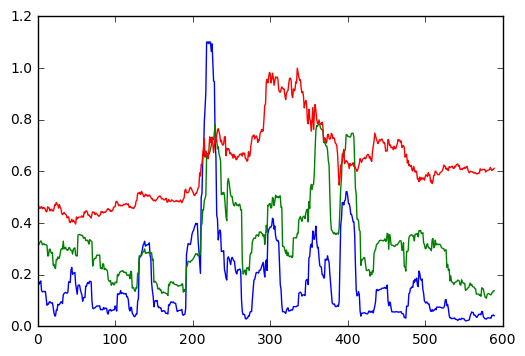

In [12]:
plt.plot(vol_ratio)
plt.plot(vol_ratio2)
plt.plot(dataset['CLOSE_AFTY'].iloc[startind:endind,].values/max(dataset['CLOSE_AFTY'])*1)
plt.show()

#### Parameters

In [140]:
preparationdays = datetime.timedelta(days = 365) # data preparation
dts = "2012-01-01" # start date
dte = "2016-07-01" # end date
enddate = datetime.datetime.strptime(dte,"%Y-%m-%d")
backtest = Calendar['Date'].loc[dts:dte]
n = 20
rebalanceday = range(0,len(backtest),n) # rebalance every n days
rebalance = backtest.iloc[rebalanceday]
M = 5 # divide universe into M buckets
returns = np.zeros(shape=(len(backtest),M)) # calculate returns of each bucket

In [ ]:
for day in range(len(rebalance)):
    print(day)
    currentdate = datetime.datetime.strptime(rebalance.iloc[day],"%Y-%m-%d")
    dti = (currentdate-preparationdays).strftime("%Y-%m-%d")
    universe = StockID['ID'].iloc[np.where(np.logical_and(StockID['listDate']<dti,StockID['assetClass']=="E"))] # stock universe.
    factor = np.arange(0,len(universe),dtype=np.float)
    
    holddays = min(20,(enddate - currentdate)/datetime.timedelta(days=1))
    stock_returns = np.zeros(shape=(len(universe),holddays))
    for stock in range(len(universe)):
        dataset = stock_universe[universe.iloc[stock]]
        dataset = dataset.loc[dti:dte]
        dataset['DailyRT'] = np.log(dataset['CLOSE_AFTY']).diff()
        dataset = dataset.iloc[1:,:]
        
        # factor construction
        i = np.where(dataset['Date'] == rebalance.iloc[day])[0][0]
        stock_returns[stock,:] = dataset['DailyRT'].iloc[i:(i+holddays)]
        # no suspended stocks
        if dataset['AMT'].iloc[i]==0 and dataset['HIGH'].iloc[i] == dataset['LOW'].iloc[i]: 
            factor[stock] = -10000
        else:
            factor[stock] = dataset['Marketcap'].iloc[i-1]
            #ratio1 = (max(dataset['CLOSE_AFTY'].iloc[(i-20):(i-1)])-min(dataset['CLOSE_AFTY'].iloc[(i-20):(i-1)]))/min(dataset['CLOSE_AFTY'].iloc[(i-20):(i-1)])
            #ratio2 = (max(dataset['CLOSE_AFTY'].iloc[(i-200):(i-1)])-min(dataset['CLOSE_AFTY'].iloc[(i-200):(i-1)]))/min(dataset['CLOSE_AFTY'].iloc[(i-200):(i-1)])
            #factor[stock] = ratio1*np.std(dataset['DailyRT'].iloc[(i-20):(i-1)])/np.std(dataset['DailyRT'].iloc[(i-200):(i-1)])/ratio2
    
    # split into M buckets
    universe = universe[factor != -10000]
    stock_returns = stock_returns[factor != -10000,]
    factor = factor[factor != -10000]
    keys = np.asarray([i[0] for i in sorted(enumerate(factor), key=lambda x:x[1])])
    quantiles = pd.qcut(factor,M,labels=range(0,M))
    for q in range(M):
        returns[n*day:n*day+n,q] = np.sum(stock_returns[quantiles==q,],0)/stock_returns[quantiles==q,].shape[0]
#plt.plot(returns[0:n*day+n])

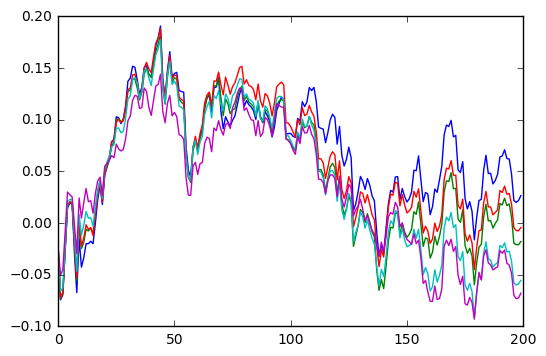

In [31]:
plt.plot(np.cumsum(returns[0:n*day+n],0))
#plt.plot(np.cumsum(returns[0:n*day+n,4],0))


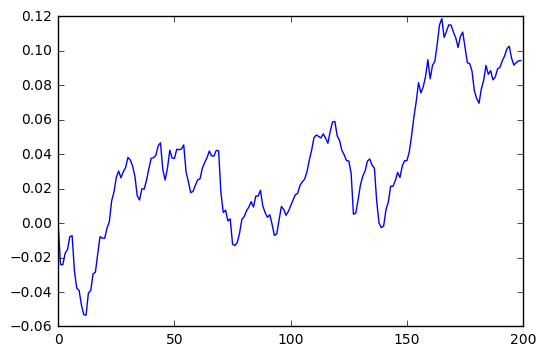

In [30]:
plt.plot(np.cumsum(returns[0:n*day+n,0]-returns[0:n*day+n,4],0))


In [52]:
d = pd.DataFrame(stock_universe[universe.iloc[0]]['CLOSE_AFTY'])
d= d.set_index(stock_universe[universe.iloc[0]]['Date'])
#kk = pd.DataFrame(stock_universe[universe.iloc[0]]['CLOSE_AFTY']).append(pd.DataFrame(stock_universe[universe.iloc[1000]]['CLOSE_AFTY']))

In [137]:
d = stock_universe[universe.iloc[0]]

In [152]:
d[dti:dte]['CLOSE']
d.head()

,Date,TRADE_STATUS,PRE_CLOSE,OPEN,HIGH,LOW,CLOSE,VOLUME,AMT,VWAP,...,MF_AMT_OPEN,MRG_LONG_BAL,MRG_SHORT_VOL_BAL,PRE_CLOSE_AFTY,OPEN_AFTY,HIGH_AFTY,LOW_AFTY,CLOSE_AFTY,VWAP_AFTY,Marketcap
Date,,,,,,,,,,,,,,,,,,,,,
1991-04-03,1991-04-03,½»Ò×,40.00,49.00,49.00,49.00,49.00,100.0,5000.0,50.0,...,0,0,0.0,40.00,49.00,49.00,49.00,49.00,50.0,12.9850
1991-04-04,1991-04-04,½»Ò×,49.00,48.76,48.76,48.76,48.76,300.0,15000.0,50.0,...,0,0,0.0,49.00,48.76,48.76,48.76,48.76,50.0,12.9214
1991-04-05,1991-04-05,½»Ò×,48.76,48.52,48.52,48.52,48.52,200.0,10000.0,50.0,...,0,0,0.0,48.76,48.52,48.52,48.52,48.52,50.0,12.8578
1991-04-08,1991-04-08,½»Ò×,48.52,48.04,48.04,48.04,48.04,200.0,10000.0,50.0,...,0,0,0.0,48.52,48.04,48.04,48.04,48.04,50.0,12.7306
1991-04-09,1991-04-09,½»Ò×,48.04,47.80,47.80,47.80,47.80,400.0,19000.0,47.5,...,0,0,0.0,48.04,47.80,47.80,47.80,47.80,47.5,12.6670
